In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rc("figure", figsize=(12,9))

On s'intéresse au système
$$
\begin{cases}
\dot{x}=x(a-by)\\
\dot{y}=y(cx-d)
\end{cases}
$$
avec $a,b,c,d$ des constantes positives que l'on va définir globalement ci-dessous.

On va tester plusieurs schéma numériques.

In [4]:
a, b, c, d = 1, 1, 1, 2

# Euler Explicite

On va ici utiliser
$$
\begin{cases}
x_{i+1}=x_i+dt x_i(a-by_i)\\
y_{i+1}=y_i+dt y_i(cx_i-d)
\end{cases}
$$

In [7]:
def euler_exp(x0, y0, dt, T):
    N = int(T/dt)+1
    x,y = np.zeros((2,N+1))
    x[0], y[0] = x0, y0
    for i in range(N):
        x[i+1] = x[i]*(1+dt*(a-b*y[i]))
        y[i+1] = y[i]*(1+dt*(c*x[i]-d))
    return x,y

# Euler mixte 1

On va ici utiliser
$$
\begin{cases}
x_{i+1}=x_i+dt x_{i+1}(a-by_i)\\
y_{i+1}=y_i+dt y_{i+1}(cx_i-d)
\end{cases}
$$
ce qui revient à
$$
\begin{cases}
x_{i+1}=\frac{x_i}{1-dt*(a-by_i)}\\
y_{i+1}=\frac{y_i}{1-dt*(cx_i-d)}
\end{cases}
$$

In [8]:
def euler_mixte1(x0, y0, dt, T):
    N = int(T/dt)+1
    x,y = np.zeros((2,N+1))
    x[0], y[0] = x0, y0
    for i in range(N):
        x[i+1] = x[i]/(1-dt*(a-b*y[i]))
        y[i+1] = y[i]/(1-dt*(c*x[i]-d))
    return x,y

# Euler mixte 2

On va ici utiliser
$$
\begin{cases}
x_{i+1}=x_i+dt x_i(a-by_{i+1})\\
y_{i+1}=y_i+dt y_i(cx_{i+1}-d)
\end{cases}
$$
ce qui revient à
$$
\begin{cases}
x_{i+1}=x_i\frac{1+a dt+b dt y_i(1-d dt)}{1+bc(dt)^2x_iy_i}\\
y_{i+1}=y_i\frac{1-d dt-c dt x_i(1+a dt)}{1+bc(dt)^2x_iy_i}
\end{cases}
$$

In [13]:
def euler_mixte2(x0, y0, dt, T):
    N = int(T/dt)+1
    x,y = np.zeros((2,N+1))
    x[0], y[0] = x0, y0
    for i in range(N):
        denum = 1+b*c*dt**2*x[i]*y[i]
        x[i+1] = x[i]*(1+a*dt+b*dt*y[i]*(1-d*dt))/denum
        y[i+1] = y[i]*(1-d*dt-c*dt*x[i]*(1+a*dt))/denum
    return x,y

# Symplectique simple

On va ici utiliser
$$
\begin{cases}
x_{i+1}=x_i+dt x_i(a-by_i)\\
y_{i+1}=y_i+dt y_{i+1}(cx_{i+1}-d)
\end{cases}
$$
ce qui revient à
$$
\begin{cases}
x_{i+1}=x_i(1+dt(a-by_i)\\
y_{i+1}=\frac{y_i}{1-dt(cx_{i+1}-d)}
\end{cases}
$$

In [10]:
def euler_symp(x0, y0, dt, T):
    N = int(T/dt)+1
    x,y = np.zeros((2,N+1))
    x[0], y[0] = x0, y0
    for i in range(N):
        x[i+1] = x[i]*(1+dt*(a-b*y[i]))
        y[i+1] = y[i]/(1-dt*(c*x[i+1]-d))
    return x,y

# Comparaison des différents schémas

On rappelle que l'on doit observer des cycles.

In [31]:
def comparaison(dt, T=10, x0=1.5, y0=1):
    plt.plot(*euler_exp(x0, y0, dt, T), lw=2, label='Euler explicite')
    plt.plot(*euler_mixte1(x0, y0, dt, T), lw=2, label='Euler mixte1')
    plt.plot(*euler_mixte2(x0, y0, dt, T), lw=2, label='Euler mixte2')
    plt.plot(*euler_symp(x0, y0, dt, T), lw=2, label='Symplectique')
    plt.axis("equal")
    plt.legend(loc="best")
    plt.plot(x0, y0, marker="o", color="black")
    plt.xlim(1, 3)
    plt.ylim(0.5, 2)

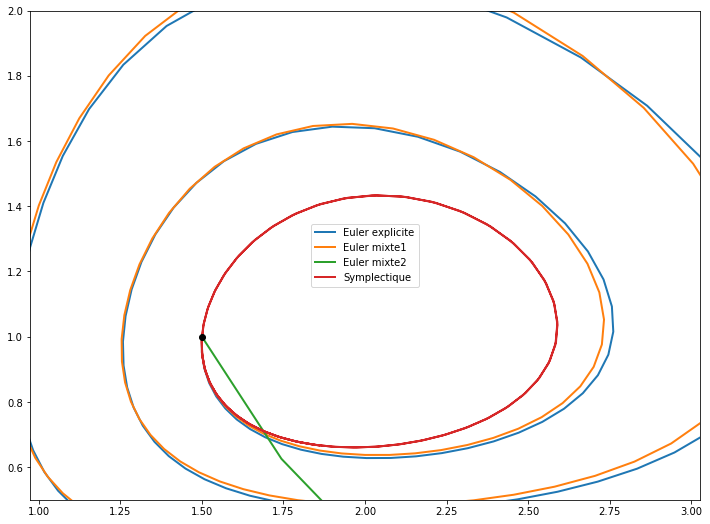

In [32]:
comparaison(0.1)

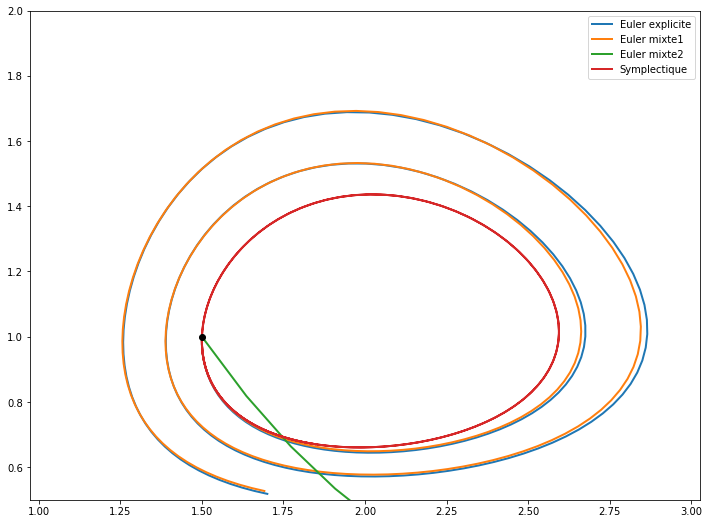

In [33]:
comparaison(0.05)

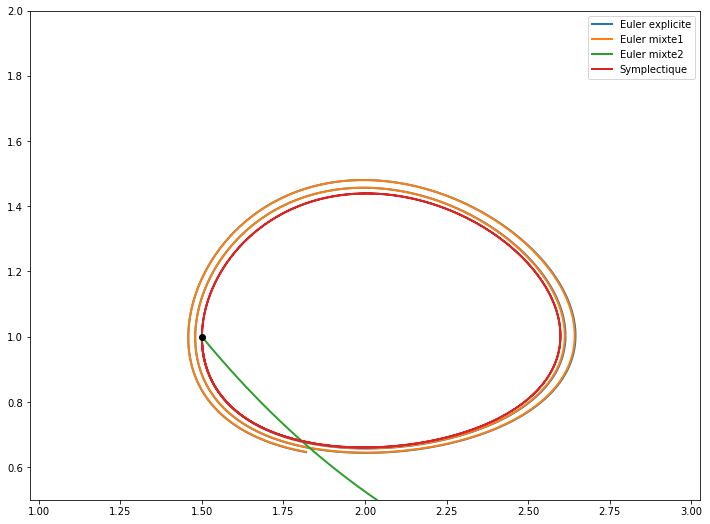

In [34]:
comparaison(0.01)